# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - LIT

<hr>

## Installing Libs

In [1]:
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in c:\users\cpcle\anaconda3\lib\site-packages (0.23.2)


In [2]:
!pip install xgboost --upgrade

Requirement already up-to-date: xgboost in c:\users\cpcle\anaconda3\lib\site-packages (1.2.0)


In [3]:
!pip install imblearn --upgrade

Requirement already up-to-date: imblearn in c:\users\cpcle\anaconda3\lib\site-packages (0.0)


<hr>

## Download dos conjuntos de dados em formato .csv

In [37]:
import pandas as pd

In [38]:
#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/training_dataset.csv
df_training_dataset = pd.read_csv(r'C:\Users\cpcle\OneDrive\Documentos\Celso\Maratona Behind the Code 2020\Desafio 6\training_dataset.csv')
df_training_dataset.tail()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
15852,620397030.0,Bacharelado,UFF,Outros,Borracha,0.0,0.0,1.0,8.0,NaN,10.0,NaN,NaN,NaN,perfil6
15853,229931283.0,Bacharelado,NaN,Advogado,NaN,0.0,0.0,1.0,7.0,Linkedin,42.0,17.0,15.0,NaN,perfil5
15854,480674907.0,Tecnólogo,UNIP,Sócio/Dono/Proprietário,NaN,0.0,NaN,1.0,7.0,Outros,30.0,9.0,8.0,0.0,perfil5
15855,559626807.0,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Advogado,Estado,0.0,0.0,1.0,10.0,NaN,226.0,102.0,93.0,1.0,perfil1
15856,743652801.0,NaN,FGV-RJ,NaN,Siderurgica,1.0,1.0,1.0,9.0,Outros,125.0,98.0,97.0,1.0,perfil1


Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os usuários da plataforma:

**id**

**graduacao**

**universidade**

**profissao**

**organizacao**

**pretende_fazer_cursos_lit**

**interesse_mba_lit**

**importante_ter_certificado**

**horas_semanais_estudo**

**como_conheceu_lit**

**total_modulos**

**modulos_iniciados**

**modulos_finalizados**

**certificados**

**categoria**

In [39]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15857 entries, 0 to 15856
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          13945 non-null  float64
 1   graduacao                   13950 non-null  object 
 2   universidade                13920 non-null  object 
 3   profissao                   13977 non-null  object 
 4   organizacao                 13961 non-null  object 
 5   pretende_fazer_cursos_lit   13989 non-null  float64
 6   interesse_mba_lit           14003 non-null  float64
 7   importante_ter_certificado  13918 non-null  float64
 8   horas_semanais_estudo       13959 non-null  float64
 9   como_conheceu_lit           13915 non-null  object 
 10  total_modulos               13987 non-null  float64
 11  modulos_iniciados           14044 non-null  float64
 12  modulos_finalizados         13924 non-null  float64
 13  certificados                139

In [40]:
df_training_dataset.nunique()

id                            13945
graduacao                         6
universidade                     21
profissao                        12
organizacao                      11
pretende_fazer_cursos_lit         2
interesse_mba_lit                 2
importante_ter_certificado        1
horas_semanais_estudo             9
como_conheceu_lit                 9
total_modulos                   578
modulos_iniciados               372
modulos_finalizados             339
certificados                     23
categoria                         6
dtype: int64

## Análise dos dados:

In [41]:
# Quantidade de NaN's por coluna
print('Quantidade de na''s por coluna')
print(df_training_dataset.isna().sum())

# Distribuição dos categóricos
print('\nQuantidade de categorias não únicas:')
print(df_training_dataset.nunique())

# Print columns with less than 30 categories
print('\nDetahamento das colunas com até 30 categorias')
a = df_training_dataset.nunique()
a = [col for col in a.index if a.loc[col] < 30]
for col in a:
    print('\n' + col)
    print(df_training_dataset[col].value_counts())

Quantidade de nas por coluna
id                            1912
graduacao                     1907
universidade                  1937
profissao                     1880
organizacao                   1896
pretende_fazer_cursos_lit     1868
interesse_mba_lit             1854
importante_ter_certificado    1939
horas_semanais_estudo         1898
como_conheceu_lit             1942
total_modulos                 1870
modulos_iniciados             1813
modulos_finalizados           1933
certificados                  1878
categoria                        0
dtype: int64

Quantidade de categorias não únicas:
id                            13945
graduacao                         6
universidade                     21
profissao                        12
organizacao                      11
pretende_fazer_cursos_lit         2
interesse_mba_lit                 2
importante_ter_certificado        1
horas_semanais_estudo             9
como_conheceu_lit                 9
total_modulos                   578

<hr>

## Detalhamento do desafio: classificação multiclasse

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de uma plataforma de ensino. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``categoria``

<hr>

Aqui importamos todas as biblitecas que serão utilizadas para o balanceamento e treinamento dos dados

In [42]:
from sklearn.model_selection  import train_test_split
                                     
from sklearn.preprocessing    import OneHotEncoder
from sklearn.metrics          import f1_score, accuracy_score,\
                                     plot_confusion_matrix
# Balanceamento das categorias
from imblearn.over_sampling   import SMOTE
from imblearn.under_sampling  import RandomUnderSampler

# Algoritmo utilizado
import xgboost                as xgb

Não vamos utilizar as colunas 'id' e 'importante_ter_certificado', pois id é um índice e a outra é constante.

## Pre-processando o dataset antes do treinamento

Separando as colunas categóricas, das numéricas:

In [43]:
# Lista de colunas não utilizadas
drop_cols = ['id', 'importante_ter_certificado']

# Cria lista das colunas categóricas
a = df_training_dataset.nunique()
col_cat = [col for col in a.index if  (df_training_dataset[col].dtype == 'O')
                                & (col != 'categoria')]

# Lista de colunas categóricas a codificar
col_cat = [col for col in col_cat if col not in drop_cols]
# Lista colunas numéricas
col_num = [col for col in df_training_dataset.columns if col not in \
                                         (col_cat + drop_cols + ['categoria'])]

del a

### Selecionando FEATURES (X) e definindo a variável TARGET (y)

In [44]:
X = df_training_dataset.iloc[:,:-1]
y = df_training_dataset.iloc[:,-1]

### Criando a partição de treino (80%) e de testes (20%)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 123)

### Preparando os parâmetros para o OneHotEncoder, e para a substituição dos na's

In [46]:
# Busca categorias das colunas categóricas
categorias = {}
for col in col_cat:    
    categorias[col]= list(df_training_dataset[col].value_counts().index)
    
# Preenche NaNs
valores = {'universidade':'Não Informada', 'graduacao':'Não Informada',
           'profissao':'Não Informada', 'organizacao':'Não Informada',
           'pretende_fazer_cursos_lit':0.0,
           'interesse_mba_lit':0.0,
           'horas_semanais_estudo': X_train['horas_semanais_estudo'].mean(),
           'como_conheceu_lit':'Outros',
           'total_modulos':X_train['total_modulos'].mean(),
           'modulos_iniciados':X_train['modulos_iniciados'].mean(),
           'modulos_finalizados':X_train['modulos_finalizados'].mean(),
           'certificados':X_train['certificados'].mean()
           }

# Adiciona categorias preenchidos
for col in categorias:
    if valores[col] not in categorias[col]:
        categorias[col].append(valores[col])       
        
# Gera lista de categorias a codificar
lista_cat = [categorias[col] for col in col_cat]

# Apaga variáveis já utilizadas
del [df_training_dataset, col]

### Removendo as colunas que não serão utilizadas pelo algoritmo

In [47]:
features = X_train.copy()
features.drop(columns = drop_cols, inplace= True)

### Substituindo os valores nulos

In [48]:
features.fillna(value = valores, inplace= True)

### Separação em colunas categóricas e colunas numéricas

In [51]:
categorical_columns = features.loc[:, col_cat]
numeric_columns = features.loc[:, col_num]

### Codificação das colunas categóricas

In [52]:
ohe = OneHotEncoder(handle_unknown='ignore', categories=lista_cat)

a = ohe.fit_transform(categorical_columns)
b = pd.DataFrame(a.toarray())
b.columns = ohe.get_feature_names().tolist()
b.index = categorical_columns.index

features = pd.concat([b, 
                    numeric_columns], ignore_index=False,
                    axis='columns')

## Treinando o modelo

### Balanceamento das categorias alvo

In [53]:
## Balanceamento
features, y_train = SMOTE(sampling_strategy='auto').fit_resample(features, y_train)
features, y_train = RandomUnderSampler(sampling_strategy='auto', random_state=555).fit_resample(features, y_train)

### Modelo Extreme Gradient Booster, com parâmetros já refinados

In [54]:
model = xgb.XGBClassifier(booster='gbtree',
                          n_estimators=200, eta=0.05, max_depth=6,
                          min_child_weight=2, gamma=0.5, subsample=1,
                          colsample_bytree=1, objective='multi:softmax',
                          eval_metric='merror', num_class=6)

In [55]:
model.fit(features, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.05,
              eval_metric='merror', gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0500000007, max_delta_step=0, max_depth=6,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_class=6, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Fazendo previsões na amostra de teste

### Preparando matriz de testes

In [57]:
features = X_test.copy()
# Elimina colunas não usadas
features.drop(columns = drop_cols, inplace= True)

# Substitui nulos
features.fillna(value = valores, inplace= True)

# Codifica colunas categóricas
categorical_columns = features.loc[:, col_cat]
numeric_columns = features.loc[:, col_num]

ohe = OneHotEncoder(handle_unknown='ignore', categories=lista_cat)

a = ohe.fit_transform(categorical_columns)
b = pd.DataFrame(a.toarray())
b.columns = ohe.get_feature_names().tolist()
b.index = categorical_columns.index

features = pd.concat([b, 
                    numeric_columns], ignore_index=False,
                    axis='columns')

In [58]:
y_pred = model.predict(features)
print(y_pred)

['perfil2' 'perfil5' 'perfil2' ... 'perfil1' 'perfil6' 'perfil3']


### Analisando a qualidade do modelo através da matriz de confusão

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

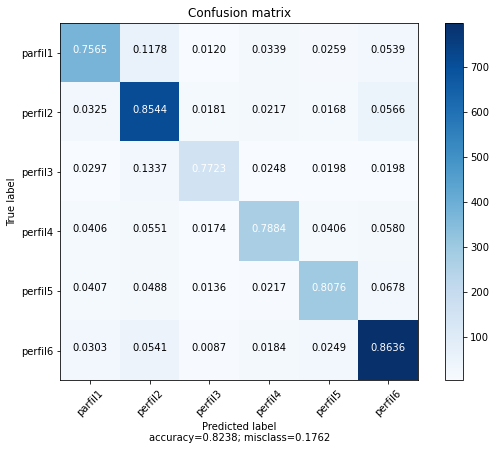

In [60]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['parfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

<hr>

## Retreinando o modelo com todos os dados

In [61]:
# Recalcula novas médias, com o arquivo completo
# Preenche NaNs
valores = {'universidade':'Não Informada', 'graduacao':'Não Informada',
           'profissao':'Não Informada', 'organizacao':'Não Informada',
           'pretende_fazer_cursos_lit':0.0,
           'interesse_mba_lit':0.0,
           'horas_semanais_estudo': X['horas_semanais_estudo'].mean(),
           'como_conheceu_lit':'Outros',
           'total_modulos':X['total_modulos'].mean(),
           'modulos_iniciados':X['modulos_iniciados'].mean(),
           'modulos_finalizados':X['modulos_finalizados'].mean(),
           'certificados':X['certificados'].mean()
           }

features = X.copy()
# Elimina colunas não usadas
features.drop(columns = drop_cols, inplace= True)

# Substitui nulos
features.fillna(value = valores, inplace= True)

# Codifica colunas categóricas
categorical_columns = features.loc[:, col_cat]
numeric_columns = features.loc[:, col_num]

ohe = OneHotEncoder(handle_unknown='ignore', categories=lista_cat)

a = ohe.fit_transform(categorical_columns)
b = pd.DataFrame(a.toarray())
b.columns = ohe.get_feature_names().tolist()
b.index = categorical_columns.index

features = pd.concat([b, 
                    numeric_columns], ignore_index=False,
                    axis='columns')

## Re-treinando o modelo

In [62]:
## Balanceamento
features, y = SMOTE(sampling_strategy='auto').fit_resample(features, y)
features, y = RandomUnderSampler(sampling_strategy='auto', random_state=555).fit_resample(features, y)

In [63]:
# Treino do modelo
model.fit(features, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.05,
              eval_metric='merror', gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0500000007, max_delta_step=0, max_depth=6,
              min_child_weight=2, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_class=6, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [64]:
#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'C:\Users\cpcle\OneDrive\Documentos\Celso\Maratona Behind the Code 2020\Desafio 6\to_be_scored.csv')
df_to_be_scored.tail()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados
995,741745189,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Coordenador,Borracha,0,0,1,2,YouTube,245,63,45,1
996,996387882,Bacharelado,UFRN,Assessor,Estado,1,1,1,8,Google,163,111,96,0
997,668869418,Bacharelado,UFSCar,Gerente,Siderurgica,1,1,1,9,Facebook,56,10,4,0
998,676531718,Tecnólogo,FATEC,Outros,servicos,1,1,1,9,Mídia (revista/jornal/web),138,60,30,0
999,388402340,Especialização,UNIP,Advogado,Montadora,0,0,1,9,Mídia (revista/jornal/web),22,20,19,0


# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "categoria" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [65]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          1000 non-null   int64 
 1   graduacao                   1000 non-null   object
 2   universidade                1000 non-null   object
 3   profissao                   1000 non-null   object
 4   organizacao                 1000 non-null   object
 5   pretende_fazer_cursos_lit   1000 non-null   int64 
 6   interesse_mba_lit           1000 non-null   int64 
 7   importante_ter_certificado  1000 non-null   int64 
 8   horas_semanais_estudo       1000 non-null   int64 
 9   como_conheceu_lit           1000 non-null   object
 10  total_modulos               1000 non-null   int64 
 11  modulos_iniciados           1000 non-null   int64 
 12  modulos_finalizados         1000 non-null   int64 
 13  certificados                1000 non-null   int64

<hr>

## Vamos aplicar as transformações ao arquivo fornecido:

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no modelo

In [66]:
features = df_to_be_scored.copy()
# Elimina colunas não usadas
features.drop(columns = drop_cols, inplace= True)

# Substitui nulos
features.fillna(value = valores, inplace= True)

# Codifica colunas categóricas
categorical_columns = features.loc[:, col_cat]
numeric_columns = features.loc[:, col_num]

ohe = OneHotEncoder(handle_unknown='ignore', categories=lista_cat)

a = ohe.fit_transform(categorical_columns)
b = pd.DataFrame(a.toarray())
b.columns = ohe.get_feature_names().tolist()
b.index = categorical_columns.index

features = pd.concat([b, 
                    numeric_columns], ignore_index=False,
                    axis='columns')

<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [67]:
y_pred = model.predict(features)

In [69]:
features['target'] = y_pred
features.tail()

,x0_Licenciatura,x0_Bacharelado,x0_Especialização,x0_MBA,x0_Tecnólogo,x0_SEM FORMAÇÃO,x0_Não Informada,x1_UFPE,x1_INSPER INSTITUTO DE ENSINO E PESQUISA,x1_UEPB,...,x4_Minha empresa - benefício LITpass,x4_Instagram,pretende_fazer_cursos_lit,interesse_mba_lit,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados,target
995,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,2,245,63,45,1,perfil1
996,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,1,8,163,111,96,0,perfil2
997,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,1,9,56,10,4,0,perfil6
998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,1,9,138,60,30,0,perfil2
999,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,9,22,20,19,0,perfil3


### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [70]:
#project.save_data(file_name=r"C:\Users\cpcle\OneDrive\Documentos\Celso\Maratona Behind the Code 2020\Desafio 6\results.csv", data=df_to_be_scored.to_csv(index=False))

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://lit.maratona.dev
